# Graded Project: Sample Solution

## Learning Outcomes:
- Exploratory data analysis & preparing the data for model building. 
- Training and making predictions using different classification models.
- Model evaluation.


## Load and Explore the data.

### 1. Import the required libraries and read the dataset.

In [82]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [117]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/TelcomCustomer-Churn.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
## Make a copy of the dataset will use it later for EDA
dfc = df.copy()# Backup the original data

In [119]:
#df = pd.read_csv('TelcomCustomer-Churn.csv')

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [120]:
## checking first few samples 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [121]:
## Checking the shape
df.shape

(7043, 21)

In [122]:
## lets check the basic information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [124]:
## We can see that totalcharges is in object datatype, So convert it to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

dfc = df.copy()

## Data cleaning and Exploratory Data Analysis:

### Data Cleaning:

### 3. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any 

In [125]:
## checking the percentage of missing values.

def check_missing_values(df):
    '''Function to check the missing data percentage'''
    print("percentage of missing data of dataframe \n",df.isnull().sum()/len(df)*100)
    
check_missing_values(df)

percentage of missing data of dataframe 
 customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64


### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [126]:
## Checking if there are any duplicate entires.

def check_duplicate(df):
    duplicate=df[df.duplicated()]
    return duplicate

duplicate=check_duplicate(df)
duplicate

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### 5. Drop the columns which you think redundant for the analysis

In [127]:
## Dropping the column CustomerID
df.drop('customerID',axis=1,inplace=True)

### 6. Encode the categorical variables

In [128]:
## Encoding categorical variables using label encoder

## select object datatype variables
object_type_variables = [i for i in df.columns if df.dtypes[i] == object]
object_type_variables 


le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))  
        df[i] = q                               
        df[i] = df[i].astype(int)
encoder(df)

In [129]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


### Exploratory data analysis:

### 7. Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 

In [130]:
# --- Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

In [131]:
# --- Use the copy of the data for the analysis

In [132]:
## Let us check the statistical summary of the numerical variables
dfc.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [133]:
## Let us check the statistical summary of the categorical variables
dfc.select_dtypes(include='O').describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


- The average tenure of the customers is around 32 months.
- The maximum monthlycharges is around 118.75 and minimum is around 18.25
- The average totalcharges charged for the customers is around 2279.79
- There are 7043 unique customers.
- We can observe that there are 4 different PaymentMethods and 3 different InternetServices.

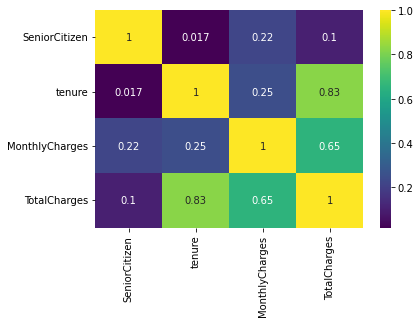

In [134]:
sns.heatmap(dfc.corr(),annot=True,cmap='viridis')
plt.show()

- As we can observe from the above heatmap, The variables tenure and Totalcharges are having high positive correlation, we can say that as the tenure of a customer increases there is a significant increase in the totalcharges charged for a customer.
- And also the variables totalcharges and monthlycharges are having a high positive correlation.

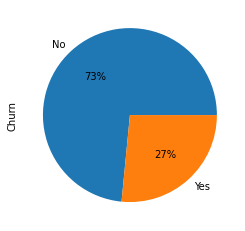

In [135]:
# Visualizing Churn proportion
dfc['Churn'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

- We can observe that the 27% of the customers have churned. 
- Also, we can note that the target class is imbalanced. which means we have a much larger proportion of one specific class over another.

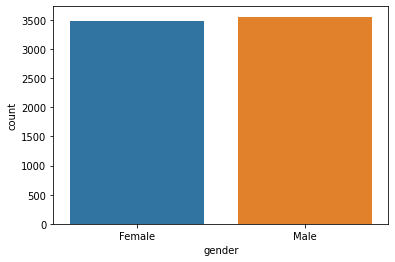

In [136]:
# Lets check the gender distribution of the customers.
sns.countplot(dfc['gender'])
plt.show()

- As we can observed that there are almost equal number of male and female customers.

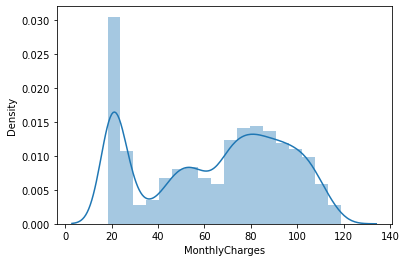

In [137]:
# lets check the distribution of the column monthly charges and total charges.
sns.distplot(dfc['MonthlyCharges'])
plt.show()

- As we can observe from the above distribution plot of the monthlycharges is skewed towards left.

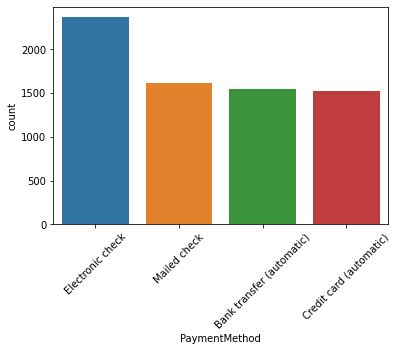

In [138]:
## lets check the distribution of the different PaymentMethod.
sns.countplot(dfc['PaymentMethod'])
plt.xticks(rotation=45)
plt.show()

- We can observe that there are four different payment methods.
- Most of the customers use electronic check for payments.

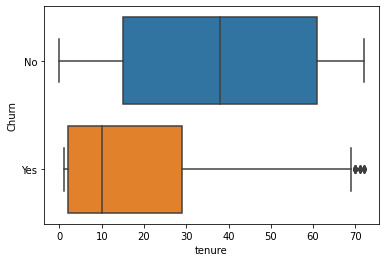

In [139]:
# Visualizing how churn interacts with tenure
sns.boxplot(dfc['tenure'],dfc['Churn'])
plt.show()

- It's possible to conclude that 75% of clients who discontinue their subscriptions do so within the first 29 months of service. Half of them leave untill the 10th month, not even staying for a year as clients.

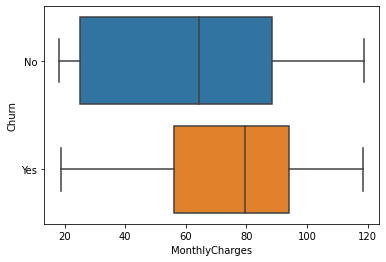

In [140]:
# Visualizing relationship monthlycharges Vs tenure
sns.boxplot(dfc['MonthlyCharges'],dfc['Churn'])
plt.show()

- Through the boxplot above, it's clear to see that customers who leave are those who pay more monthly for their services!
- Averagely, the monthly cost for these clients was higher than the average cost for clients who stayed in the company! Even among the clients who paid less, the ones who left the company still paid more than those who stayed.

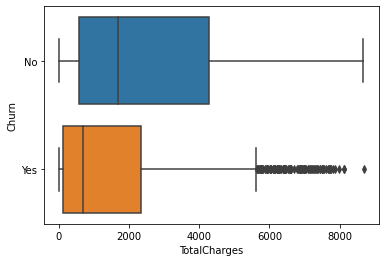

In [141]:
# Visualizing relationship totalcharges Vs tenure
sns.boxplot(dfc['TotalCharges'],dfc['Churn'])
plt.show()

- Even though clients who leave the company pay more monthly, those who stay as clients end up with higher amounts of total charges. It isn't surprising, since they usually stay longer with us, so their total amount of payments will be higher than those who left the company much earlier.

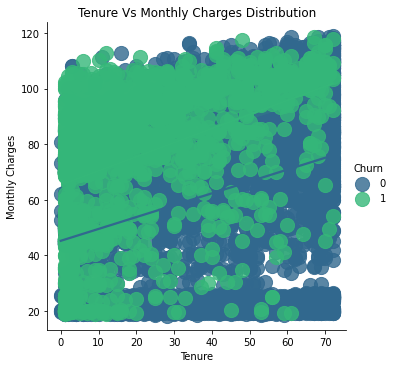

In [142]:
## Lets check the relationship between tenure and the monthlycharges with respect to the target column Churn.
ax = sns.lmplot(height = 5, data = df, x = 'tenure', y = 'MonthlyCharges',
              hue = 'Churn', scatter_kws={'s': 200}, line_kws = None, palette = 'viridis')
ax.set(xlabel = 'Tenure', ylabel = 'Monthly Charges')
ax = plt.title('Tenure Vs Monthly Charges Distribution')

- We can observe a large concentration of clients who left the company in the upper left part of the plot above.
- Also, we can see a higher trendline for clients who left, confirming that they do have higher charges per month than those who stay.

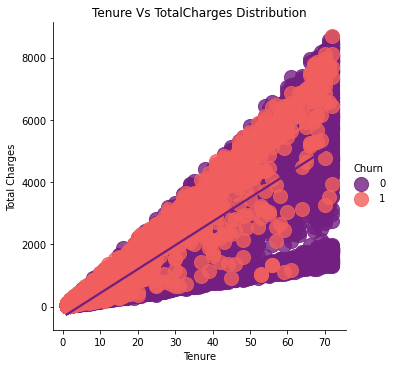

In [143]:
## Lets check the relationship between tenure and the totalcharges with respect to the target column Churn.
ax = sns.lmplot(height = 5, data = df, x = 'tenure', y = 'TotalCharges',
              hue = 'Churn', scatter_kws={'s': 200}, line_kws = None, palette = 'magma')
ax.set(xlabel = 'Tenure', ylabel = 'Total Charges')
ax = plt.title('Tenure Vs TotalCharges Distribution')

- We can observe that the variables tenure and totalcharges are having a linear relationship.
- As the tenure increases the Totalcharges also increases.

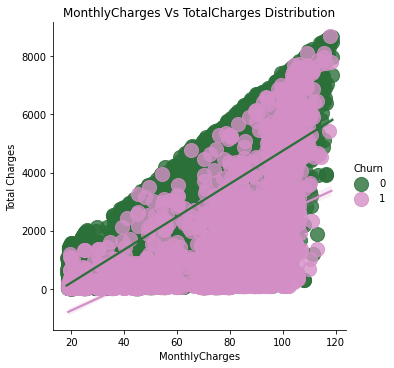

In [144]:
## Lets check the relationship between MonthlyCharges and the totalcharges with respect to the target column Churn.
ax = sns.lmplot(height = 5, data = df, x = 'MonthlyCharges', y = 'TotalCharges',
              hue = 'Churn', scatter_kws={'s': 200}, line_kws = None, palette = 'cubehelix')
ax.set(xlabel = 'MonthlyCharges', ylabel = 'Total Charges')
ax = plt.title('MonthlyCharges Vs TotalCharges Distribution')

- As we can observe a linear relationship between the variables monthlycharges and totalcharges.
- There is a high concentration of the churned customers in the right middle part, which says that the customers who paid high monthly charges are more likely to be churned.

## Data Preparation for model building:

### 8. Store the target column (i.e. Churn) in the y variable and the rest of the columns in the X variable (2 points)

In [ ]:
# Data split: Independent vs target variable

X = df.drop(['Churn'],axis=1)  
y = df['Churn']                  

### 9. Split the dataset into two parts (i.e. 70% train and 30% test)

In [ ]:
## Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)  

### 10. Standardize the columns using z-score scaling approach

In [ ]:
## Scaling the data
ss = StandardScaler()
X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:])

In [ ]:
X_train.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1768,-0.999189,-0.440447,-0.971205,-0.661617,1.242334,0.330698,-0.994822,-1.179622,-0.912353,-1.028900,1.230888,-0.922965,-1.113972,1.141887,0.367913,-1.202263,-0.524973,-0.212682,-0.126413
3556,1.000812,-0.440447,1.029648,1.511449,-1.075505,0.330698,-0.994822,1.539189,0.249595,0.104614,0.098113,0.235146,0.013493,0.014408,0.367913,-1.202263,1.357293,-1.515766,-1.607707


In [ ]:
X_test.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6418,1.000812,-0.440447,1.029648,-0.661617,-0.058909,0.330698,1.115536,-1.179622,-0.912353,-1.0289,1.230888,1.393257,1.140958,1.141887,0.367913,0.831765,1.357293,0.478852,-0.607967
1948,-0.999189,-0.440447,-0.971205,-0.661617,-1.238161,0.330698,-0.994822,0.179783,-0.912353,-1.0289,-1.034663,-0.922965,-1.113972,1.141887,-0.829323,-1.202263,0.416160,0.527176,-1.185087


## Model buidling and Evaluation:

### 11. Write a function. (4 points)
- i) Which can take the model and data as inputs.
- ii) Fit the model with the train data.
- iii) Make predictions on the test set.
- iv) Returns the Accuracy Score.


In [ ]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs

    model.fit(X_train, y_train)   # fits the model with the train data

    pred = model.predict(X_test)  # makes predictions on the test set

    accuracy = accuracy_score(y_test, pred)
                   
    return accuracy  # return all the metrics

### 12. Use the function and train a Logistic regression, KNN, and Naive Bayes, Decision tree, Random forest, Boosting and Stacking Classifier models and make predictions on test data.

In [ ]:
## Intializing the models

lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf', rf),('knn', knn), ('gb', gb), ('adb', adb)]
sc = StackingClassifier(estimators=estimators, final_estimator=rf)

In [ ]:
result = pd.DataFrame(columns = ['Accuracy'])

for model, model_name in zip([lr, nb, knn, dt, rf, adb, gb, sc], 
                             ['Logistic Regression','Naive Bayes','KNN','Decision tree', 
                              'Random Forest', 'Ada Boost', 'Gradient Boost', 'Stacking']):
    
    result.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test)

### 13. Display and compare all the models designed with their test accuracies.

In [ ]:
result

,Accuracy
Logistic Regression,0.803597
Naive Bayes,0.749172
KNN,0.744439
Decision tree,0.731661
Random Forest,0.787506
Ada Boost,0.793658
Gradient Boost,0.801704
Stacking,0.780880


### 14. Select the final best trained model along with your detailed comments for selecting this model. 

- The final best performing model is Logistic Regression model
- The logistic regression model is giving us the highest accuracy score compare to all the other models.

### 15. Write your conclusion on the results and mention the steps to be taken further in order to improve the performance of the model.

- Exploratory data analysis made it possible for us to draw a profile of clients that discontinue their subscriptions and the kind of services and contracts they usually sign for, which helps the company to make specific improvements and develop strategies to retain these clients.
- We have explored the variables with respect to the subcription charges for the customers and inferred that the charges were a very important variable whether the customer is going to stay or churn.
- The Company has pay more focus on the subscription charges for the customers and giving certain discounts and offers and promote their business and can make the customers retain with them.
- We have build different classification models, the logistic regression model is giving us the best accuracy score for training and testing with a balanced results.
- Please note, we have seen that the target class is imbalanced so, we can further go with evaluating the models based on the different performance metrics such as presicion, recall and F1score and choose the model accordingly.
- Also, we can tune the hyperparameters and find the best set of hyperparameters will increase the classification accuracy of the model.

### Happy Learning :)